In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv
/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_zipcode_population.csv
/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_data_dictionary.csv


In [2]:
churn_data = pd.read_csv('/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv')
churn_data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
zip_data = pd.read_csv('/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_zipcode_population.csv')
zip_data.head()

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


In [4]:
churn_data.columns.to_list()

['Customer ID',
 'Gender',
 'Age',
 'Married',
 'Number of Dependents',
 'City',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Number of Referrals',
 'Tenure in Months',
 'Offer',
 'Phone Service',
 'Avg Monthly Long Distance Charges',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Avg Monthly GB Download',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Customer Status',
 'Churn Category',
 'Churn Reason']

In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [6]:
churn_data.drop(columns=['Customer ID'],inplace=True)
churn_data.iloc[0]

Gender                                     Female
Age                                            37
Married                                       Yes
Number of Dependents                            0
City                                 Frazier Park
Zip Code                                    93225
Latitude                                34.827662
Longitude                             -118.999073
Number of Referrals                             2
Tenure in Months                                9
Offer                                        None
Phone Service                                 Yes
Avg Monthly Long Distance Charges           42.39
Multiple Lines                                 No
Internet Service                              Yes
Internet Type                               Cable
Avg Monthly GB Download                      16.0
Online Security                                No
Online Backup                                 Yes
Device Protection Plan                         No


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

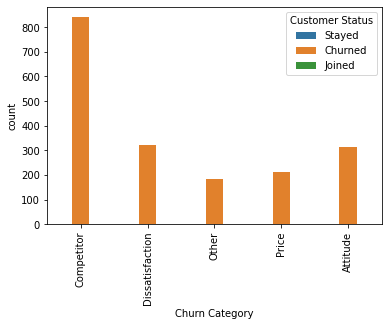

In [8]:
sns.countplot(data = churn_data, x='Churn Category', hue='Customer Status')
plt.xticks(rotation=90)
plt.show()

In [9]:
# no affect of churn on gender
# many people who are married join this network more and unmarried people leave the network
# offer E was not good as per data
# there were few newly joined people for single line network
# many people left network for some internet related issues
# no security may also be the reason to leave the network
# also of no backup churn inceased but also have slight more new joiners to no backup than backup plan
# no device proteection plan may also be reason but new joiner might not care for it
# no premium tech support
# more people opted to churn instead of staying for mtm contract
# bank payment may have some issues
# top 3 reasons forn churn competitor has better devices and pricing and support were ruid

In [10]:
churn_data.isna().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                   

In [11]:
churn_data['Avg Monthly GB Download'] = churn_data['Avg Monthly GB Download'].fillna(0)
churn_data['Avg Monthly GB Download'] = churn_data['Avg Monthly GB Download'].astype('int')
churn_data['Avg Monthly Long Distance Charges'] = churn_data['Avg Monthly Long Distance Charges'].fillna(0)
churn_data = churn_data.fillna('NA')

In [12]:
churn_data.isna().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                 

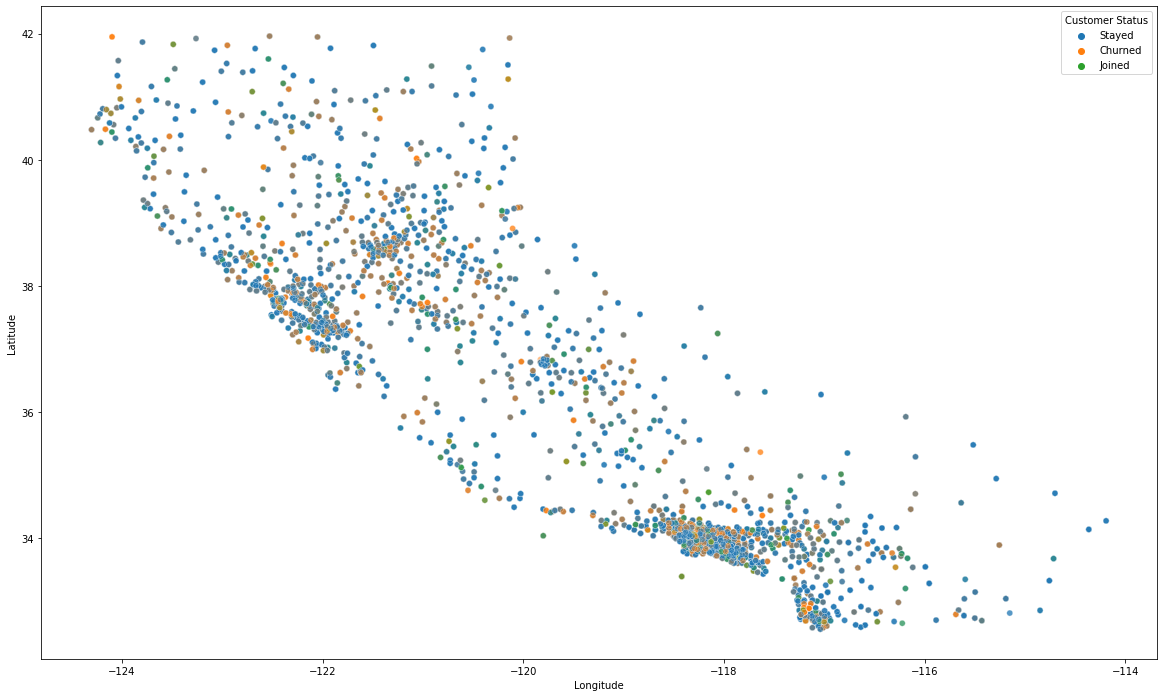

In [13]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.scatterplot(data = churn_data , x='Longitude',y='Latitude',hue='Customer Status',alpha=0.5)
plt.show()

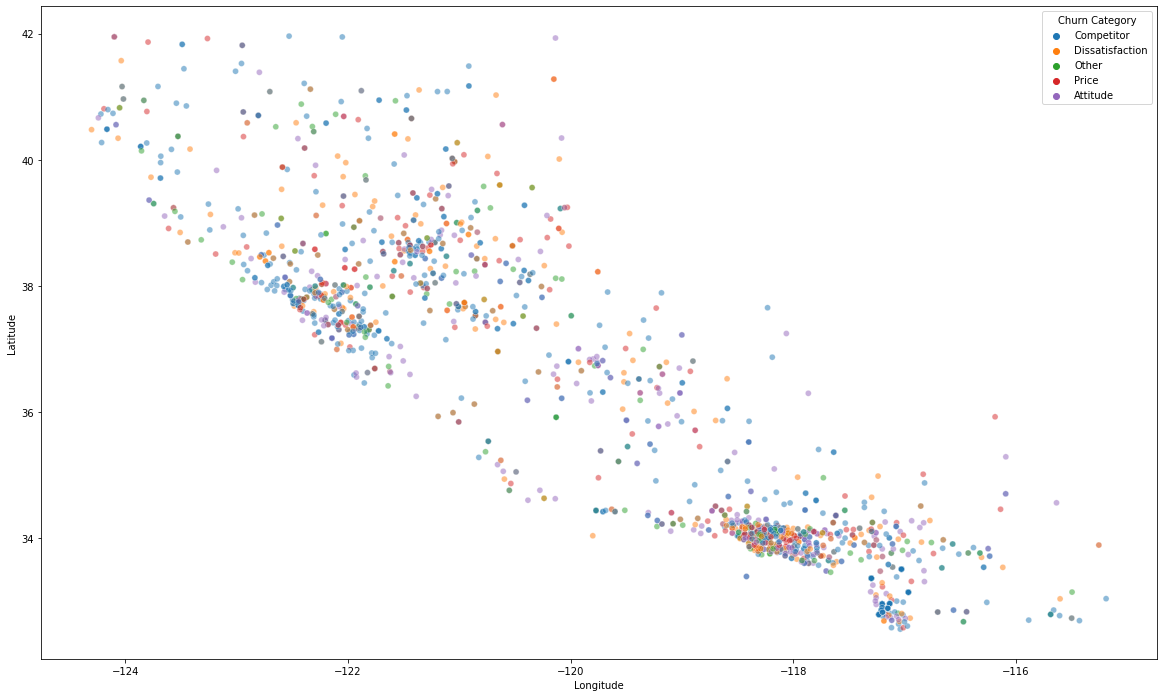

In [14]:
fig, ax = plt.subplots(figsize=(20, 12))
churned = churn_data[churn_data['Customer Status']=='Churned']
sns.scatterplot(data = churned , x='Longitude',y='Latitude',hue='Churn Category',alpha=0.5)
plt.show()

In [15]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              7043 non-null   object 
 11  Phone Service                      7043 non-null   objec

In [16]:
churn_data.iloc[0]

Gender                                     Female
Age                                            37
Married                                       Yes
Number of Dependents                            0
City                                 Frazier Park
Zip Code                                    93225
Latitude                                34.827662
Longitude                             -118.999073
Number of Referrals                             2
Tenure in Months                                9
Offer                                        None
Phone Service                                 Yes
Avg Monthly Long Distance Charges           42.39
Multiple Lines                                 No
Internet Service                              Yes
Internet Type                               Cable
Avg Monthly GB Download                        16
Online Security                                No
Online Backup                                 Yes
Device Protection Plan                         No


In [17]:
churn_data.drop(columns=['City','Zip Code','Churn Category','Churn Reason'],inplace=True)
new_churn_data = pd.get_dummies(churn_data)
new_churn_data.iloc[0]

Age                             37.000000
Number of Dependents             0.000000
Latitude                        34.827662
Longitude                     -118.999073
Number of Referrals              2.000000
                                  ...    
Payment Method_Credit Card       1.000000
Payment Method_Mailed Check      0.000000
Customer Status_Churned          0.000000
Customer Status_Joined           0.000000
Customer Status_Stayed           1.000000
Name: 0, Length: 70, dtype: float64

In [18]:
X = new_churn_data.drop(columns=['Customer Status_Churned','Customer Status_Joined','Customer Status_Stayed','Gender_Female','Married_No','Phone Service_No','Multiple Lines_NA','Internet Service_No','Internet Type_NA','Online Security_NA','Online Backup_NA','Device Protection Plan_NA','Premium Tech Support_NA','Premium Tech Support_NA','Streaming TV_NA','Streaming Movies_NA','Streaming Music_NA','Unlimited Data_NA'])
y = new_churn_data[['Customer Status_Churned','Customer Status_Stayed']]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)
X_train.shape,X_test.shape

((6338, 53), (705, 53))

In [20]:
X_train.columns.to_list()

['Age',
 'Number of Dependents',
 'Latitude',
 'Longitude',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue',
 'Gender_Male',
 'Married_Yes',
 'Offer_None',
 'Offer_Offer A',
 'Offer_Offer B',
 'Offer_Offer C',
 'Offer_Offer D',
 'Offer_Offer E',
 'Phone Service_Yes',
 'Multiple Lines_No',
 'Multiple Lines_Yes',
 'Internet Service_Yes',
 'Internet Type_Cable',
 'Internet Type_DSL',
 'Internet Type_Fiber Optic',
 'Online Security_No',
 'Online Security_Yes',
 'Online Backup_No',
 'Online Backup_Yes',
 'Device Protection Plan_No',
 'Device Protection Plan_Yes',
 'Premium Tech Support_No',
 'Premium Tech Support_Yes',
 'Streaming TV_No',
 'Streaming TV_Yes',
 'Streaming Movies_No',
 'Streaming Movies_Yes',
 'Streaming Music_No',
 'Streaming Music_Yes',
 'Unlimited Data_No',
 'Unlimited Data_Yes',


In [21]:
num_cols = [col for col in churn_data.columns if churn_data[col].dtype in ['int','float']]
num_cols

['Age',
 'Number of Dependents',
 'Latitude',
 'Longitude',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue']

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer([("scaler", StandardScaler(),num_cols)],remainder='passthrough')
new_X_train = ct.fit_transform(X_train)
new_X_train

array([[ 1.93938297, -0.48565619, -0.13095246, ...,  1.        ,
         0.        ,  0.        ],
       [-0.80468397, -0.48565619,  0.55639511, ...,  0.        ,
         1.        ,  0.        ],
       [-1.52052752, -0.48565619, -0.82636455, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.68665676, -0.48565619, -0.87170298, ...,  1.        ,
         0.        ,  0.        ],
       [-0.02918679, -0.48565619, -1.1426584 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.04329849, -0.48565619,  1.28173133, ...,  1.        ,
         0.        ,  0.        ]])

In [23]:
new_X_test = ct.transform(X_test)

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8141843971631205

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf_2 = RandomForestClassifier(random_state=42)
clf_2.fit(X_train,y_train)
clf_2.score(X_test,y_test)

0.8170212765957446

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


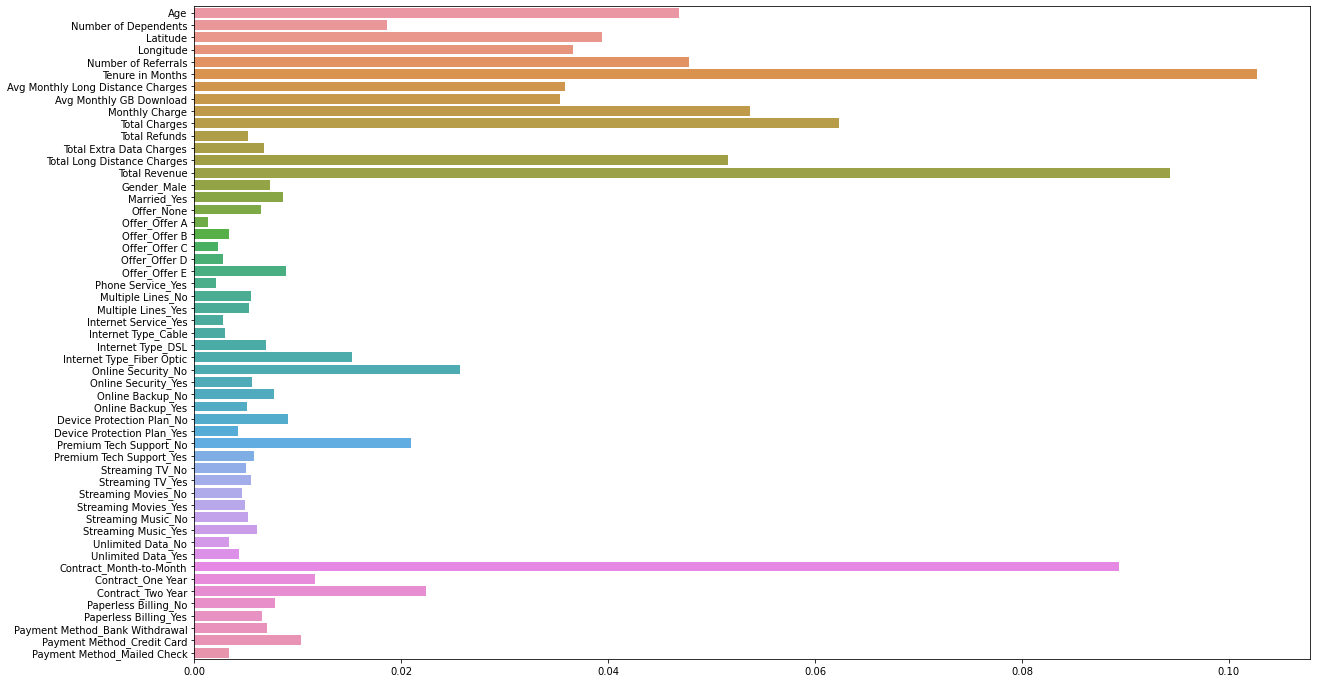

In [26]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.barplot(clf_2.feature_importances_,X_train.columns)
plt.show()

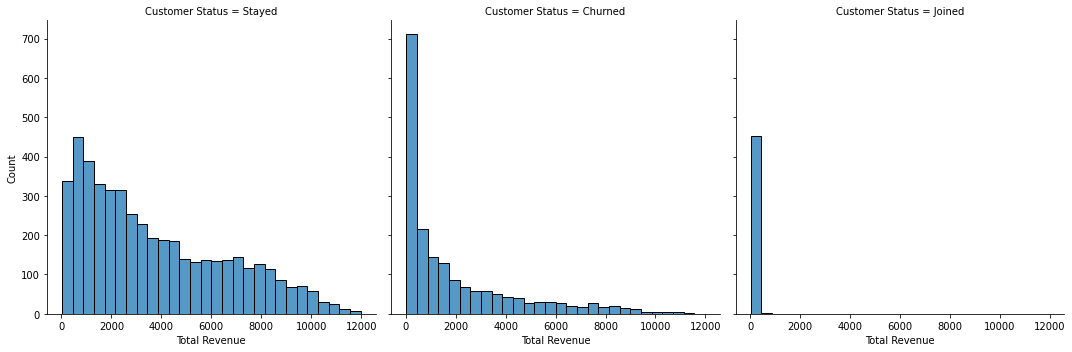

In [27]:
sns.displot(data = churn_data, x='Total Revenue', col='Customer Status')
plt.show()

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
clf4 = XGBClassifier()
clf4.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [29]:
clf4.score(X_test,y_test)

0.825531914893617

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


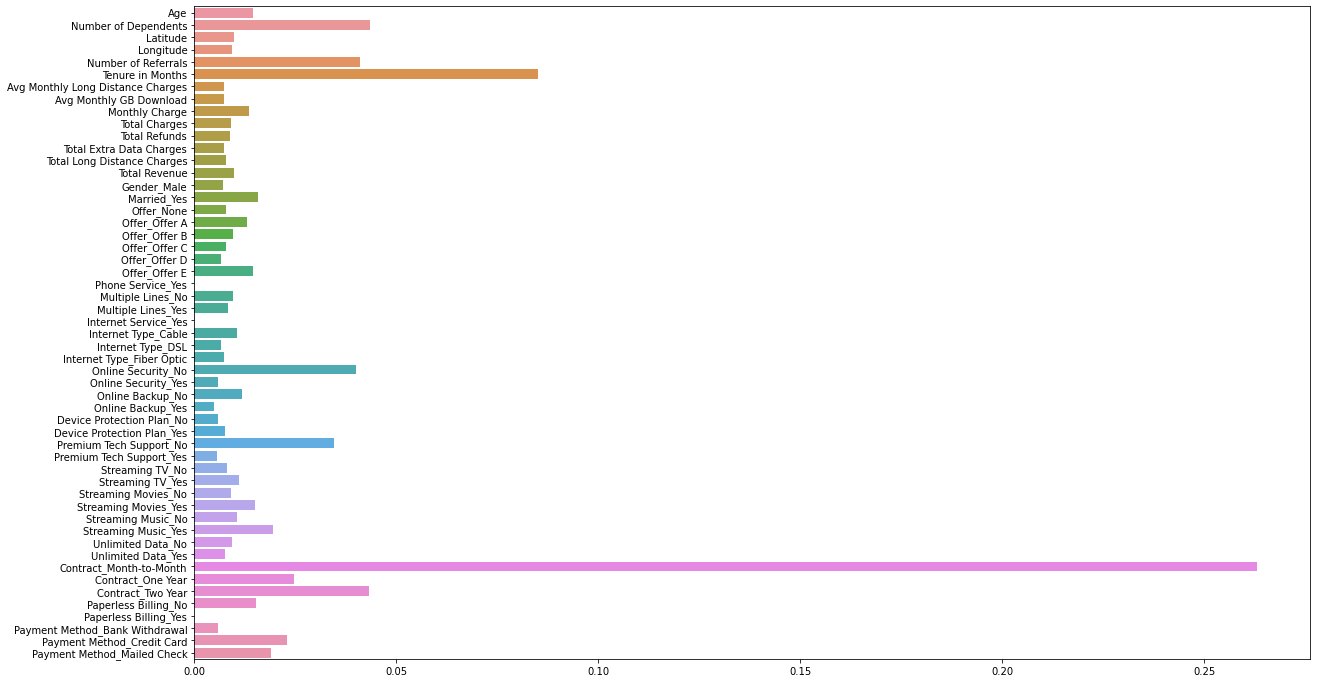

In [30]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.barplot(clf4.feature_importances_,X_train.columns)
plt.show()

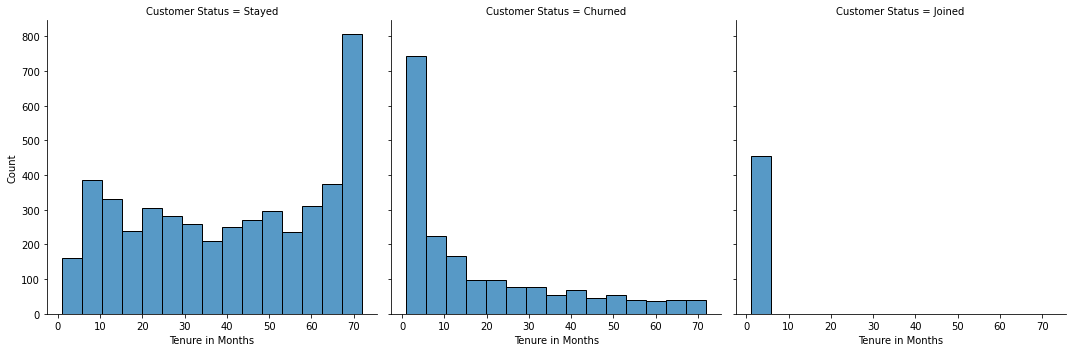

In [31]:
sns.displot(data = churn_data, x='Tenure in Months', col='Customer Status')
plt.show()

In [32]:
# from above models and graph we are safe to assume that the main reason the customers are leaving the network is beacuse 
# of the pricing strategy applied by network in month-to-month basis the compeptitors are providing better pricing & product
# beacuse of this people who have less revenue are not able to afford the pricing of network and are leaving the network 
# in less than 5 months